In [1]:
import ndlib

In [2]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.SIModel as si

# Network topology
g = nx.karate_club_graph()

# Model selection
model = si.SIModel(g)
# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('gamma', 0.1)

model.set_initial_status(cfg)

infected_nodes = [32]
cfg.add_model_initial_configuration("Infected", infected_nodes)

iterations = model.iteration_bunch(100, node_status=True)
#print(iterations)
trends = model.build_trends(iterations)
#trends

F:\anaconda\lib\site-packages\ndlib\models\DiffusionModel.py:114: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


In [3]:
import json
#print(json.dumps(model.parameters, indent=2))

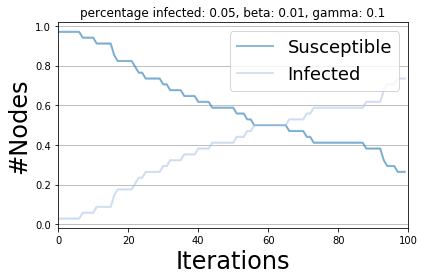

In [4]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot(percentile=90)

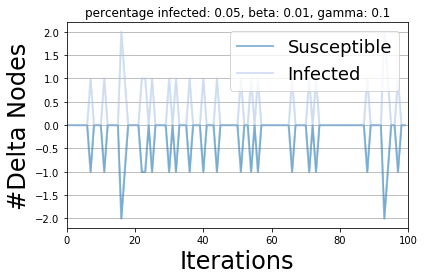

In [5]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot(percentile=90)

# import ndlib.models.CompositeModel as gc
import ndlib.models.compartments.NodeStochastic as ns
import ndlib.models.compartments.ConditionalComposition as cif

# Composite Model instantiation
model = gc.CompositeModel(g)

# Model statuses
model.add_status("Susceptible")
model.add_status("Infected")

# Compartment definition
c1 = ns.NodeStochastic(0.5, "Infected")
c2 = ns.NodeStochastic(0.2)
c3 = ns.NodeStochastic(0.1)

# Conditional Composition
cc = cif.ConditionalComposition(c1, c2, c3)

# Rule definition
model.add_rule("Susceptible", "Infected", cc)

# Model initial status configuration
config = mc.Configuration()
config.add_model_parameter('percentage_infected', 0.1)
infected_nodes = [11]
config.add_model_initial_configuration("Infected", infected_nodes)

# Simulation execution
model.set_initial_status(config)
iterations = model.iteration_bunch(50)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()

In [6]:
#print(trends)